# Import Packages and Datasets

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm # cross correlation
from prophet import Prophet

In [52]:
currency_name = {
    'Pablos' : 'San Escobar Pablos',
    'Credits' : 'Galactic Credits',
    'Dragons' : '7 Kingdoms Golden Dragons'}

In [94]:
# Import data

data_currency = pd.read_csv('../data/currencies_history.csv')

data_currency.rename(columns = {
    'SanEscobarPablos' : 'Pablos', 
    'GalacticCredits' : 'Credits', 
    '7KingdomsGoldenDragons' : "Dragons"}, 
    inplace = True)
print(data_currency)

data_fuel_price = pd.read_csv('../data/Q4C_hint1.csv')
del data_fuel_price['Unnamed: 0']
data_fuel_price.rename(columns = {'bioFruitPulpPrice' : 'Pulp_price'}, inplace = True)
print(data_fuel_price)

           Date    Pablos   Credits   Dragons
0    1000-01-03  1.000000  1.000000  1.000000
1    1000-01-10  0.992992  0.993418  0.988996
2    1000-01-17  0.988567  0.984193  0.981877
3    1000-01-24  0.999371  0.993381  0.984385
4    1000-01-31  1.014246  1.009505  0.992576
..          ...       ...       ...       ...
504  1009-09-01  3.734013  1.781049  1.152489
505  1009-09-08  3.725841  1.781063  1.151324
506  1009-09-15  3.667033  1.763477  1.145472
507  1009-09-22  3.694200  1.767235  1.145266
508  1009-09-29  3.734622  1.773911  1.148276

[509 rows x 4 columns]
           Date  Pulp_price
0    1000-01-03    1.000000
1    1000-01-10    1.038779
2    1000-01-17    1.027378
3    1000-01-24    0.993185
4    1000-01-31    0.979005
..          ...         ...
512  1009-10-27    0.765565
513  1009-11-03    0.777222
514  1009-11-10    0.791260
515  1009-11-17    0.797337
516  1009-11-24    0.808808

[517 rows x 2 columns]


# Creating Visuals

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

<function matplotlib.pyplot.show(close=None, block=None)>

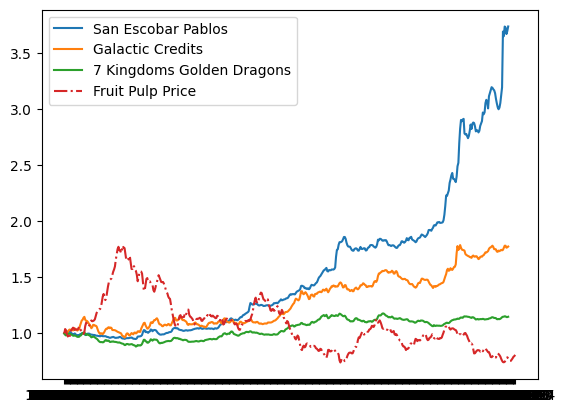

In [95]:
# Plot time series

plt.plot(data_currency.Date, data_currency.Pablos, label = currency_names['Pablos'])
plt.plot(data_currency.Date, data_currency.Credits, label = currency_names['Credits'])
plt.plot(data_currency.Date, data_currency.Dragons, label = currency_names['Dragons'])
plt.plot(data_fuel_price.Date, data_fuel_price.Pulp_price, '-.', label = 'Fruit Pulp Price')
plt.legend()

plt.show

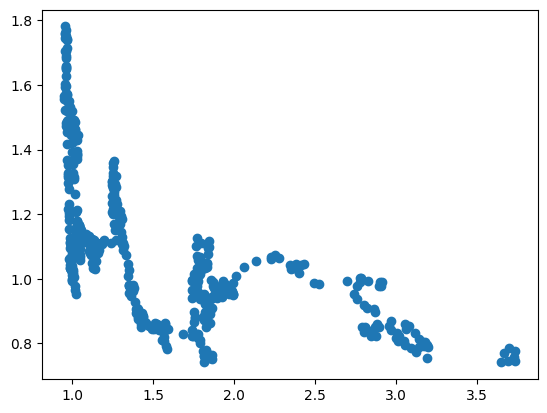

[[ 1.        -0.6305692]
 [-0.6305692  1.       ]]


In [96]:
# Check and plot correlation between San Escobar currency price and fruit pulp price

plt.scatter(data_currency.Pablos, 
            data_fuel_price.Pulp_price[data_fuel_price.Date <= max(data_currency.Date)])
plt.show()

# Just a simple Pearson correlation
print(np.corrcoef(data_currency.Pablos,
                  data_fuel_price.Pulp_price[data_fuel_price.Date <= max(data_currency.Date)]))

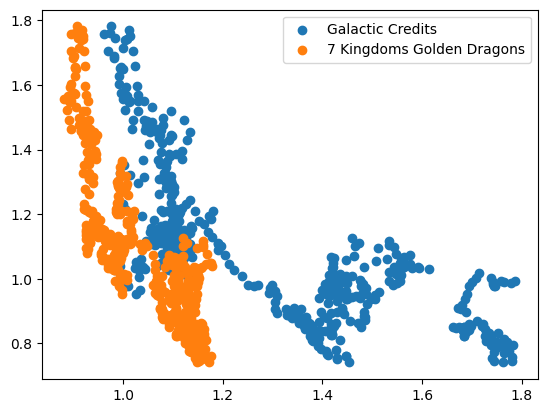

[[ 1.         -0.71368094]
 [-0.71368094  1.        ]]
[[ 1.         -0.82018292]
 [-0.82018292  1.        ]]


In [97]:
# I was wondering if we can correlate this pulp price with other currencies, so I've checked

plt.scatter(data_currency.Credits, 
            data_fuel_price.Pulp_price[data_fuel_price.Date <= max(data_currency.Date)],
           label = currency_names['Credits'])
plt.scatter(data_currency.Dragons, 
            data_fuel_price.Pulp_price[data_fuel_price.Date <= max(data_currency.Date)],
           label = currency_names['Dragons'])
plt.legend()
plt.show()

# Just a simple Pearson correlation
print(np.corrcoef(data_currency.Credits,
                  data_fuel_price.Pulp_price[data_fuel_price.Date <= max(data_currency.Date)]))
print(np.corrcoef(data_currency.Dragons,
                  data_fuel_price.Pulp_price[data_fuel_price.Date <= max(data_currency.Date)]))

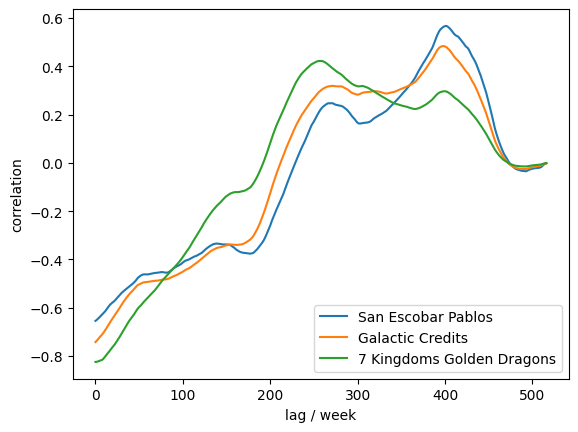

In [98]:
# Compute and plot cross correlation between currencies and pulp price

cross_correlation_pablos = sm.tsa.stattools.ccf(data_currency.Pablos, 
                                                data_fuel_price.Pulp_price, adjusted = False)
cross_correlation_credits = sm.tsa.stattools.ccf(data_currency.Credits, 
                                                 data_fuel_price.Pulp_price, adjusted = False)
cross_correlation_dragons = sm.tsa.stattools.ccf(data_currency.Dragons, 
                                                 data_fuel_price.Pulp_price, adjusted = False)

plt.plot(np.arange(0, cross_correlation_pablos.size), 
         cross_correlation_pablos, 
         label = currency_names['Pablos'])
plt.plot(np.arange(0, cross_correlation_credits.size), 
         cross_correlation_credits, 
         label = currency_names['Credits'])
plt.plot(np.arange(0, cross_correlation_dragons.size),
         cross_correlation_dragons, 
         label = currency_names['Dragons'])
plt.xlabel('lag / week')
plt.ylabel('correlation')
plt.legend()
plt.show()

# Testing Prophet

In [99]:
def prophet_convertion(y, df = data_currency, ds = 'Date'):
    return pd.DataFrame().assign(ds = df[ds], y = df[y])

In [100]:
data_pablos = prophet_convertion('Pablos')
data_credits = prophet_convertion('Credits')
data_dragons = prophet_convertion('Dragons')

In [152]:
#model = Prophet()
#model.fit(data_pablos)

# I'm trying to convert Date, but it doesn't work

#data_currency['Date'] = [date.replace("1", "2", 1) for date in data_currency['Date']]
#pd.to_datetime(data_currency['Date'])

ParserError: day is out of range for month: 2000-02-32

In [150]:
data_currency['Date']

0      2000-01-03
1      2000-01-10
2      2000-01-17
3      2000-01-24
4      2000-01-31
          ...    
504    2009-09-01
505    2009-09-08
506    2009-09-15
507    2009-09-22
508    2009-09-29
Name: Date, Length: 509, dtype: object

In [ ]:
print(df)